# Problem Statement:
data source : data.cityofnewyork.us

#### 1-The contemporary job market of NEWYORK CITY  is characterized by a myriad of opportunities spanning various industries and sectors, reflecting the diverse needs of both employers and job seekers.

#### 2-Employers encounter challenges in navigating the dynamic job market landscape, including effectively allocating resources, designing targeted recruitment strategies, and comprehending the specific demands inherent within each job category.

#### 3-Job seekers, particularly students embarking on their career journeys, face the daunting task of deciphering the intricacies of the job market. They must consider numerous factors such as salary expectations, residency prerequisites, career advancement prospects, and qualification requisites to make informed career decisions.

#### 4-Amidst these challenges, they exists a critical need for in-depth insights into job market dynamics encompassing salary trends, residency constraints, career advancement opportunities, and qualification preferences across diverse sectors.

#### 5-Such insights serve as invaluable tools for employers, empowering them to fine-tune recruitment methodologies, optimize resource allocation, and gain a deeper understanding of prevailing job market trends ofNEWYORK CITY  .

#### 6-For job seekers, especially students, a comprehensive understanding of these dynamics facilitates informed decision-making regarding career paths, skill enhancement initiatives, and strategic job search endeavors.

#### 7-Engaging in internships, networking endeavors, and acquiring pertinent work experience emerges as pivotal strategies for students to gain firsthand insights into potential career trajectories and align their skillsets with prevailing job market demands of NEWYORK CITY .

## Consequently, the primary objective of this study is to meticulously analyze and interpret job market data to furnish stakeholders, including employers, job seekers, and students, with actionable insights. These insights are intended to facilitate informed decision-making processes, bolster career planning efforts, and foster enhanced alignment between individual aspirations and prevailing job market dynamics.

## import dataset

In [2]:

import pandas as pd
import datetime as dt
import csv

In [3]:
jobs_ny = pd.read_csv("Jobs_NYC_Postings.csv")

In [4]:
jobs_ny.head()

,Unnamed: 0,Job ID,Agency,Posting Type,# Of Positions,Civil Service Title,Title Classification,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Minimum Qual Requirements,Residency Requirement,Posting Date
0,0,483894,HRA/DEPT OF SOCIAL SERVICES,Internal,1,COMPUTER SPECIALIST (SOFTWARE),Competitive-1,"Technology, Data & Innovation",F,Experienced (non-manager),92194.0,119610.0,Annual,(1) a baccalaureate degree from an accredited ...,New York City Residency is not required for th...,9/17/2021
1,1,483894,HRA/DEPT OF SOCIAL SERVICES,External,1,COMPUTER SPECIALIST (SOFTWARE),Competitive-1,"Technology, Data & Innovation",F,Experienced (non-manager),92194.0,119610.0,Annual,(1) a baccalaureate degree from an accredited ...,New York City Residency is not required for th...,9/17/2021
2,2,545827,HRA/DEPT OF SOCIAL SERVICES,External,1,COMPUTER SYSTEMS MANAGER,Competitive-1,"Technology, Data & Innovation",F,Manager,77688.0,152000.0,Annual,1. a master's degree in computer science from ...,New York City Residency is not required for th...,8/15/2022
3,3,545827,HRA/DEPT OF SOCIAL SERVICES,Internal,1,COMPUTER SYSTEMS MANAGER,Competitive-1,"Technology, Data & Innovation",F,Manager,77688.0,152000.0,Annual,1. a master's degree in computer science from ...,New York City Residency is not required for th...,8/15/2022
4,4,546738,HRA/DEPT OF SOCIAL SERVICES,External,1,COMPUTER SPECIALIST (SOFTWARE),Competitive-1,"Technology, Data & Innovation",F,Experienced (non-manager),85371.0,98177.0,Annual,(1) a baccalaureate degree from an accredited ...,New York City Residency is not required for th...,8/18/2022


In [5]:
jobs_ny.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     5480 non-null   int64  
 1   Job ID                         5480 non-null   int64  
 2   Agency                         5480 non-null   object 
 3   Posting Type                   5480 non-null   object 
 4   # Of Positions                 5480 non-null   int64  
 5   Civil Service Title            5480 non-null   object 
 6   Title Classification           5480 non-null   object 
 7   Job Category                   5480 non-null   object 
 8   Full-Time/Part-Time indicator  5361 non-null   object 
 9   Career Level                   5480 non-null   object 
 10  Salary Range From              5480 non-null   float64
 11  Salary Range To                5480 non-null   float64
 12  Salary Frequency               5480 non-null   o

##### by analyzing our dataframe info we conclude:¶
* we have null values in:
    * fulltime/ parttime indicator column
    * minimum qualifacation column
# "DATA CLEANING AND PREPROCESSING:"
* to do 1:
        delete whole column of unnamed as this is the index coloumn i dont need it
* to do 2:
        clean and fill minimum qualification
* to do 3:
        to fill and clean parttime fulltime column
* to do 4:
        to clean the residency requirements and update accordingly
* to do 5:
        to convert Posted Date column values from objest to datetime
* to do 6:
        to standardize my salaries columns and crate new columns for it 
* to do 7:
        to update columns name accordingly

#### to do 1:-
* delete first column named as unnamed

In [6]:
jobs_ny.drop(columns='Unnamed: 0', inplace=True)
jobs_ny.tail(2)

,Job ID,Agency,Posting Type,# Of Positions,Civil Service Title,Title Classification,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Minimum Qual Requirements,Residency Requirement,Posting Date
5478,627046,NYC EMPLOYEES RETIREMENT SYS,Internal,4,ASSISTANT RETIREMENT BENEFITS,Competitive-1,Administration & Human Resources,P,Entry-Level,24.7548,33.3968,Hourly,1. an associate degree or completion of 60 cre...,New York City residency is generally required ...,2/15/2024
5479,627046,NYC EMPLOYEES RETIREMENT SYS,External,4,ASSISTANT RETIREMENT BENEFITS,Competitive-1,Administration & Human Resources,P,Entry-Level,24.7548,33.3968,Hourly,1. an associate degree or completion of 60 cre...,New York City residency is generally required ...,2/16/2024


#### Done 
#### to do 2:

* we are working to extract the minimum Qualification required in the respective fields 
* as the minimum qualification column has so much of noise in it
* i am thinking to make a function just extract the name of the degree required from the point values 
                *  we have Null point values too / we change them into "not specified"
                *  we have many other qualification which are not a degree program / we change them to "others" 
                *  if we have any degree or certiofication in the point value we will extract them and update the column 
                   with that name of qualification

## logic :extracting the minimum qualification from job requirements enables recruiters to better define candidate criteria, streamline the hiring process, and ensure fairness and transparency in recruitment practice

In [6]:
jobs_ny["Minimum Qual Requirements"]

0       (1) a baccalaureate degree from an accredited ...
1       (1) a baccalaureate degree from an accredited ...
2       1. a master's degree in computer science from ...
3       1. a master's degree in computer science from ...
4       (1) a baccalaureate degree from an accredited ...
                              ...                        
5475    1. a four-year high school diploma or its educ...
5476    qualification requirements  1. high school bac...
5477    qualification requirements  1. high school bac...
5478    1. an associate degree or completion of 60 cre...
5479    1. an associate degree or completion of 60 cre...
Name: Minimum Qual Requirements, Length: 5480, dtype: object

In [7]:
jobs_ny["Minimum Qual Requirements"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5475    False
5476    False
5477    False
5478    False
5479    False
Name: Minimum Qual Requirements, Length: 5480, dtype: bool

In [8]:
(jobs_ny["Minimum Qual Requirements"].isnull()).sum()

45

In [9]:
# filling null values with not specified
jobs_ny["Minimum Qual Requirements"] = jobs_ny["Minimum Qual Requirements"].fillna("not specified")

In [10]:
#checking again if the values are filled
(jobs_ny["Minimum Qual Requirements"].isnull()).sum()

0

In [11]:
jobs_ny["Minimum Qual Requirements"] = jobs_ny["Minimum Qual Requirements"].str.lower() 
# converting every point value in lower case 

In [12]:
#i have made a coomon qualification pattern
# includes all major qualification and not specified which we filled in null spaces
pattern = r"(baccalaureate degree|bachelor's degree|master's degree|high school|diploma|graduation|matriculation|certificate|certification|not specified)"

In [13]:
jobs_ny["Minimum Qual Requirements"]=jobs_ny["Minimum Qual Requirements"].str.extract(pattern)

In [14]:
# check unique values to check our results and value counts
print(jobs_ny["Minimum Qual Requirements"].unique())
jobs_ny["Minimum Qual Requirements"].str.extract(pattern).value_counts()

['baccalaureate degree' "master's degree" 'certificate' 'matriculation'
 'high school' nan 'graduation' 'certification' "bachelor's degree"
 'not specified' 'diploma']


baccalaureate degree    2344
high school             1004
master's degree          760
bachelor's degree        134
matriculation             78
certificate               62
certification             60
not specified             45
graduation                12
diploma                    2
Name: count, dtype: int64

In [15]:
#checking if we have any rows which doesnt contain our mentioned qualification as we have 
#filled our Nan values beforhand, these nan values contains other qualification which we have not 
#in our pattern
jobs_ny["Minimum Qual Requirements"].isnull() 
(jobs_ny["Minimum Qual Requirements"].isnull()).sum()

979

In [16]:
#we have 979 rows with other qualification so we will fill it with "others"
jobs_ny["Minimum Qual Requirements"] = jobs_ny["Minimum Qual Requirements"].fillna("others")

In [17]:
#checking if all rows are updated
jobs_ny["Minimum Qual Requirements"].isnull() 
(jobs_ny["Minimum Qual Requirements"].isnull()).sum()

0

#we have achieved our clean column of minimum qualification 
#### done 

### to do 3 :
* we have to deal with null values 
* update F with full time
* update P with part time

## logic : I want to use the salary frequency column to assist in the imputation of the "full time part time" column, as i can leverage the relationship between salary frequency and job type (full-time or part-time) to make informed imputations.

* I analyzed the data to see if there are consistent patterns between salary frequency and job type. 
* For example, full-time positions might more commonly have monthly or annual salaries, while part-time positions might have hourly salaries.

* i will use Conditional Imputation based on the patterns i observed, i can impute missing values in the "full time part time" column conditionally based on the salary frequency.

In [18]:
#create a bool series to extract the rows
bool_pf = jobs_ny["Full-Time/Part-Time indicator"].isnull()
bool_pf.sum()

119

In [19]:
#checking my data
jobs_ny.loc[bool_pf , "Full-Time/Part-Time indicator" ]    

98      NaN
99      NaN
123     NaN
146     NaN
147     NaN
       ... 
4924    NaN
5275    NaN
5276    NaN
5367    NaN
5368    NaN
Name: Full-Time/Part-Time indicator, Length: 119, dtype: object

In [20]:
#creating varible of boolean series for null values in part time full time indicator column
null_df = jobs_ny[bool_pf]

In [21]:
#checking if salary frequency has hourly 
print((null_df["Salary Frequency"] == "Annual").sum())
print((null_df["Salary Frequency"] == ("Hourly" or "Daily")).sum())

111
8


In [22]:
#creating bool series for both rows having hourly or daily and annual values in salary frequency column
#in extracted dataframe of null values in part time full time indicator column
bool_a = null_df["Salary Frequency"] == "Annual"
bool_hd = null_df["Salary Frequency"] == ("Hourly" or "Daily")

In [23]:
#updating the part time full time indicator column with full time or part time with the help of salary frequency
null_df.loc[bool_a ,"Full-Time/Part-Time indicator"] = "full time"
null_df.loc[bool_hd , "Full-Time/Part-Time indicator"] = "part time"

In [24]:
#checking if my dataframe of null values in part time full time column is updated or not
null_df.head(2)

,Job ID,Agency,Posting Type,# Of Positions,Civil Service Title,Title Classification,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Minimum Qual Requirements,Residency Requirement,Posting Date
98,611375,BRONX DISTRICT ATTORNEY,External,1,PROCUREMENT ANALYST,Competitive-1,"Technology, Data & Innovation",full time,Experienced (non-manager),69012.0,90000.0,Annual,baccalaureate degree,City Residency is not required for this position,10/14/2023
99,611375,BRONX DISTRICT ATTORNEY,Internal,1,PROCUREMENT ANALYST,Competitive-1,"Technology, Data & Innovation",full time,Experienced (non-manager),69012.0,90000.0,Annual,baccalaureate degree,City Residency is not required for this position,10/14/2023


In [25]:
#as i have updated my extracted dataframe ,
#now updating mmy main dataframe with this updated part which i extracted from it
jobs_ny[bool_pf] = null_df

In [26]:
#checking if my extracted rows are updated or not
jobs_ny[bool_pf]

,Job ID,Agency,Posting Type,# Of Positions,Civil Service Title,Title Classification,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Minimum Qual Requirements,Residency Requirement,Posting Date
98,611375,BRONX DISTRICT ATTORNEY,External,1,PROCUREMENT ANALYST,Competitive-1,"Technology, Data & Innovation",full time,Experienced (non-manager),69012.0,90000.0,Annual,baccalaureate degree,City Residency is not required for this position,10/14/2023
99,611375,BRONX DISTRICT ATTORNEY,Internal,1,PROCUREMENT ANALYST,Competitive-1,"Technology, Data & Innovation",full time,Experienced (non-manager),69012.0,90000.0,Annual,baccalaureate degree,City Residency is not required for this position,10/14/2023
123,520114,TECHNOLOGY & INNOVATION,Internal,1,CERTIFIED IT ADMINISTRATOR (LA,Competitive-1,"Technology, Data & Innovation",full time,Experienced (non-manager),98901.0,122000.0,Annual,certification,City Residency is not required for this position,3/7/2022
146,545183,FINANCIAL INFO SVCS AGENCY,External,1,SENIOR IT ARCHITECT,Non-Competitive-5,"Technology, Data & Innovation",full time,Experienced (non-manager),100000.0,105000.0,Annual,baccalaureate degree,New York City Residency is not required for th...,8/10/2022
147,545183,FINANCIAL INFO SVCS AGENCY,Internal,1,SENIOR IT ARCHITECT,Non-Competitive-5,"Technology, Data & Innovation",full time,Experienced (non-manager),100000.0,105000.0,Annual,baccalaureate degree,New York City Residency is not required for th...,8/10/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,594652,HRA/DEPT OF SOCIAL SERVICES,External,1,PRINCIPAL ADMINISTRATIVE ASSOC,Competitive-1,Administration & Human Resources,full time,Experienced (non-manager),53057.0,77124.0,Annual,baccalaureate degree,New York City residency is generally required ...,7/27/2023
5275,546138,DEPARTMENT OF CORRECTION,External,1,DIRECTOR OF CORRECTIONAL STAND,Non-Competitive-5,Administration & Human Resources,full time,Experienced (non-manager),104000.0,110000.0,Annual,baccalaureate degree,New York City residency is not required,8/16/2022
5276,546138,DEPARTMENT OF CORRECTION,Internal,1,DIRECTOR OF CORRECTIONAL STAND,Non-Competitive-5,Administration & Human Resources,full time,Experienced (non-manager),104000.0,110000.0,Annual,baccalaureate degree,New York City residency is not required,8/16/2022
5367,604775,DEPT OF DESIGN & CONSTRUCTION,External,1,COMMUNITY COORDINATOR,Non-Competitive-5,Administration & Human Resources,full time,Experienced (non-manager),59116.0,81213.0,Annual,baccalaureate degree,New York City residency is generally required ...,9/15/2023


In [27]:
#as i achieved what i wanted now i want to change F and P to full time part time respectively
jobs_ny["Full-Time/Part-Time indicator"].str.replace('F', "full time").str.replace('P', "part time")

0       full time
1       full time
2       full time
3       full time
4       full time
          ...    
5475    full time
5476    full time
5477    full time
5478    part time
5479    part time
Name: Full-Time/Part-Time indicator, Length: 5480, dtype: object

In [28]:
#updating my column in main dataframe with the operation performed in above cell
jobs_ny["Full-Time/Part-Time indicator"]=jobs_ny["Full-Time/Part-Time indicator"].str.replace('F',"full time").str.replace('P', "part time")

In [29]:
jobs_ny.head(2)

,Job ID,Agency,Posting Type,# Of Positions,Civil Service Title,Title Classification,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Minimum Qual Requirements,Residency Requirement,Posting Date
0,483894,HRA/DEPT OF SOCIAL SERVICES,Internal,1,COMPUTER SPECIALIST (SOFTWARE),Competitive-1,"Technology, Data & Innovation",full time,Experienced (non-manager),92194.0,119610.0,Annual,baccalaureate degree,New York City Residency is not required for th...,9/17/2021
1,483894,HRA/DEPT OF SOCIAL SERVICES,External,1,COMPUTER SPECIALIST (SOFTWARE),Competitive-1,"Technology, Data & Innovation",full time,Experienced (non-manager),92194.0,119610.0,Annual,baccalaureate degree,New York City Residency is not required for th...,9/17/2021


####  my data frame is now complete without any null value 
## done 

### to do 4:-
* i analyzed residency requirements column has much noice in it,as strictly required ,generally reuired , required if necessary without any null values in it so,
* logic to clean the "residency requirements" column by categorizing it as "Yes" if residency is required and "No" if residency is not required
* all strickly necessary generaly required will become as simple as "yes" 
* not required means "No"

## logic: Cleaning and standardizing data in such a manner can help improve the consistency and clarity of your dataset, making it easier to analyze and interpret. Categorizing residency requirements into clear binary options simplifies the information and makes it more understandable for analysis purposes.

In [30]:
#checking
jobs_ny['Residency Requirement']

0       New York City Residency is not required for th...
1       New York City Residency is not required for th...
2       New York City Residency is not required for th...
3       New York City Residency is not required for th...
4       New York City Residency is not required for th...
                              ...                        
5475             New York City residency is not required.
5476    New York City residency is generally required ...
5477    New York City residency is generally required ...
5478    New York City residency is generally required ...
5479    New York City residency is generally required ...
Name: Residency Requirement, Length: 5480, dtype: object

In [31]:
# Clean the residency_requirements column
#applying lambda ,with condition if x contains not required return no else return yes
jobs_ny['Residency Requirement'] = jobs_ny['Residency Requirement'].apply(lambda x:'No' if 'not required' in x else 'Yes')

In [32]:
# no need to make any variable as i was just checking my results with same operation performed in excel
print((jobs_ny['Residency Requirement'] == "Yes").sum())
print((jobs_ny['Residency Requirement'] == "No").sum())

3572
1908


#### to do 5:-
* change Posting Date column into datetime 

## Logic :converting the "Posting Date" column into datetime format enhances the usability, flexibility, and analytical capabilities of my dataset, enabling derive meaningful insights and make informed decisions based on temporal information.

In [33]:
#converting and checking my conversion to datetime
import datetime as dt
pd.to_datetime(jobs_ny["Posting Date"])

0      2021-09-17
1      2021-09-17
2      2022-08-15
3      2022-08-15
4      2022-08-18
          ...    
5475   2024-02-14
5476   2024-02-15
5477   2024-02-15
5478   2024-02-15
5479   2024-02-16
Name: Posting Date, Length: 5480, dtype: datetime64[ns]

In [34]:
#assigning with my dataframe
jobs_ny["Posting Date"] = pd.to_datetime(jobs_ny["Posting Date"])

#### done

### to do 6::
* to standardize my salaries columns and crate new columns for it

## logic : standardizing salaries into annual rates offers numerous benefits in terms of consistency, comparability, compliance, and strategic planning, making it a widely adopted practice in human resources and financial management.

* i have 2 columns of salarioes

                * Salary Range From
                * Salary Range to
* we will check frequency with the help of Saraly frequency column and standardize salaries into annual rates


In [35]:
#as per global standards , 
        # there are 40 working hous per week
        # there are 52 weeks in a year
        # and 260 working days in a year
# Identify rows where frequency is hourly or daily or annual
bool_hs = (jobs_ny['Salary Frequency'] == 'Hourly')
bool_ds = (jobs_ny['Salary Frequency'] == 'Daily')
bool_as = (jobs_ny['Salary Frequency'] == 'Annual')
#creating new column of annual Starting salaries and putting values
jobs_ny.loc[bool_hs, "Annual Starting Salary"] = jobs_ny.loc[bool_hs, "Salary Range From"] * 40 * 52
jobs_ny.loc[bool_ds, "Annual Starting Salary"] = jobs_ny.loc[bool_ds, "Salary Range From"] * 260
jobs_ny.loc[bool_as, "Annual Starting Salary"] = jobs_ny.loc[bool_as, "Salary Range From"] * 1

In [36]:
#checking my created column 
(jobs_ny["Annual Starting Salary"].isnull()).sum()

0

In [37]:
# my first column is created , repeating the operation for another column Salary range to
#no need to create bool series as it will be same
jobs_ny.loc[bool_hs, "Annual Salary Upto"] = jobs_ny.loc[bool_hs, "Salary Range To"] * 40 * 52
jobs_ny.loc[bool_ds, "Annual Salary Upto"] = jobs_ny.loc[bool_ds, "Salary Range To"] * 260
jobs_ny.loc[bool_as, "Annual Salary Upto"] = jobs_ny.loc[bool_as, "Salary Range To"] * 1

In [38]:
#checking if all values are updated
(jobs_ny["Annual Salary Upto"].isnull()).sum()

0

#### done 


### to do 7:-
*  i will update 2 columns name:

         * 1-Minimum Qual Requirement ---> Required Qualification:
                    i have update the column with only qualification which is required for the job       
         * 2-Residency Requirement    ---> Residency In Newyork:
                    as i have changes my columns values to yes and no ,
                    yes means residency required in newyork city
                    no means , residency not required in newyork city
         * 3-# Of Position           ---->  No Of Positions
            

In [39]:
# Rename the column names
jobs_ny = jobs_ny.rename(columns={'Residency Requirement': 'Required Residency In Newyork'})
jobs_ny = jobs_ny.rename(columns={'Minimum Qual Requirements': 'Required Qualification'}) 
jobs_ny = jobs_ny.rename(columns={'# Of Positions':'No Of Positions'})
jobs_ny.columns

Index(['Job ID', 'Agency', 'Posting Type', 'No Of Positions',
       'Civil Service Title', 'Title Classification', 'Job Category',
       'Full-Time/Part-Time indicator', 'Career Level', 'Salary Range From',
       'Salary Range To', 'Salary Frequency', 'Required Qualification',
       'Required Residency In Newyork', 'Posting Date',
       'Annual Starting Salary', 'Annual Salary Upto'],
      dtype='object')

In [40]:
# checking my all operations by calling out random rows 
jobs_ny[3000:4000]      #repesent index 3000-3004 and 3995-3999

,Job ID,Agency,Posting Type,No Of Positions,Civil Service Title,Title Classification,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Required Qualification,Required Residency In Newyork,Posting Date,Annual Starting Salary,Annual Salary Upto
3000,567666,DEPT OF DESIGN & CONSTRUCTION,Internal,1,PROJECT MANAGER,Competitive-1,"Engineering, Architecture, & Planning",full time,Experienced (non-manager),57078.00,65640.00,Annual,baccalaureate degree,Yes,2023-05-10,57078.0,65640.0
3001,567666,DEPT OF DESIGN & CONSTRUCTION,External,1,PROJECT MANAGER,Competitive-1,"Engineering, Architecture, & Planning",full time,Experienced (non-manager),57078.00,65640.00,Annual,baccalaureate degree,Yes,2023-05-10,57078.0,65640.0
3002,568087,DEPT OF DESIGN & CONSTRUCTION,Internal,1,GEOLOGIST,Competitive-1,"Engineering, Architecture, & Planning",full time,Experienced (non-manager),57078.00,77921.00,Annual,baccalaureate degree,Yes,2023-05-16,57078.0,77921.0
3003,568087,DEPT OF DESIGN & CONSTRUCTION,External,1,GEOLOGIST,Competitive-1,"Engineering, Architecture, & Planning",full time,Experienced (non-manager),57078.00,77921.00,Annual,baccalaureate degree,Yes,2023-05-16,57078.0,77921.0
3004,568289,DEPARTMENT OF TRANSPORTATION,Internal,3,CIVIL ENGINEERING INTERN,Competitive-1,"Engineering, Architecture, & Planning",full time,Entry-Level,51413.00,62260.00,Annual,baccalaureate degree,No,2023-01-10,51413.0,62260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,570954,DEPT OF HEALTH/MENTAL HYGIENE,Internal,75,PUBLIC HEALTH NURSE (SCHOOL HE,Competitive-1,Constituent Services & Community Programs,part time,Experienced (non-manager),42.01,42.01,Hourly,others,No,2023-09-08,87380.8,87380.8
3996,574993,DEPT OF HEALTH/MENTAL HYGIENE,External,1,LABORATORY MICROBIOLOGIST,Competitive-1,Constituent Services & Community Programs,full time,Experienced (non-manager),56971.00,56971.00,Annual,baccalaureate degree,Yes,2023-10-11,56971.0,56971.0
3997,574993,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,LABORATORY MICROBIOLOGIST,Competitive-1,Constituent Services & Community Programs,full time,Experienced (non-manager),56971.00,56971.00,Annual,baccalaureate degree,Yes,2023-10-11,56971.0,56971.0
3998,580437,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,ASSOCIATE LABORATORY MICROBIOL,Competitive-1,Constituent Services & Community Programs,full time,Experienced (non-manager),63962.00,75000.00,Annual,baccalaureate degree,Yes,2023-10-11,63962.0,75000.0


### done

* i have cleaned my all columns  alhamdulillah 
* now we will analyze our data with respect to our problem statement 

# "DATA EXPLORTION & DESCRIPTIVE ANALYSIS"

## 1- lets analyze jobs category, i will aggregate the total demand based on the number of positions available rather than the occurance of particular job category

## Logic: summing up the values (no of positions) associated with each job category,  effectively quantifies the total demand for labor within those categories, which can provide valuable insights into the distribution and scale of employment opportunities across different job categories in the dataset.


In [41]:
no_of_position_in_each_category = jobs_ny.groupby('Job Category')['No Of Positions'].sum()

In [42]:
no_of_position_in_each_category

Job Category
Administration & Human Resources              1106
Building Operations & Maintenance             1477
Communications & Intergovernmental Affairs     193
Constituent Services & Community Programs     1736
Engineering, Architecture, & Planning         1597
Finance, Accounting, & Procurement             567
Green Jobs                                      27
Health                                         591
Health Technology, Data & Innovation            14
Legal Affairs                                 1387
Policy, Research & Analysis                    204
Public Safety, Inspections, & Enforcement      797
Social Services                               1435
Technology, Data & Innovation                  605
Name: No Of Positions, dtype: int64

In [43]:
#calculate total num of positions to find out percentage 
total_no_of_positions = no_of_position_in_each_category.sum()
total_no_of_positions

11736

In [44]:
#calculate percentage and sort it in descending order
demand_of_labour=(((no_of_position_in_each_category/total_no_of_positions)*100).sort_values(ascending = False))
#demand of labour in each sector by percentages
demand_of_labour

Job Category
Constituent Services & Community Programs     14.792093
Engineering, Architecture, & Planning         13.607703
Building Operations & Maintenance             12.585208
Social Services                               12.227335
Legal Affairs                                 11.818337
Administration & Human Resources               9.423995
Public Safety, Inspections, & Enforcement      6.791070
Technology, Data & Innovation                  5.155078
Health                                         5.035787
Finance, Accounting, & Procurement             4.831288
Policy, Research & Analysis                    1.738241
Communications & Intergovernmental Affairs     1.644513
Green Jobs                                     0.230061
Health Technology, Data & Innovation           0.119291
Name: No Of Positions, dtype: float64

<Axes: ylabel='No Of Positions'>

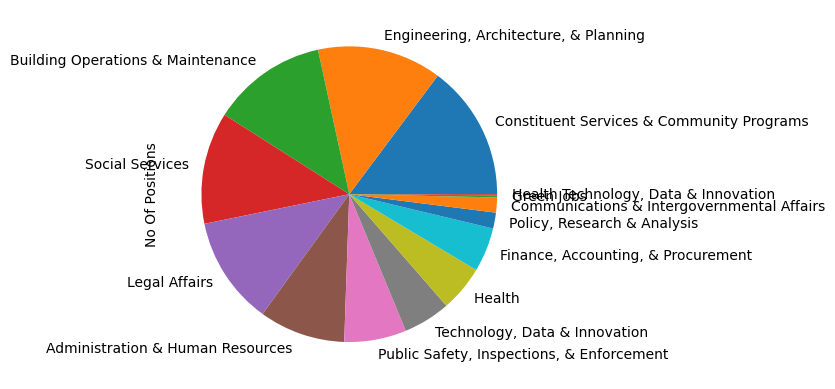

In [62]:
demand_of_labour.plot(kind= "pie")

#### to do:
* i will work on each job category separately and find the minimum qualification required in that particular job category at what career levels

Explore the most common agencies, job categories, and career levels in your dataset.

Look for any patterns or trends in the distribution of job postings across these categories.

In [45]:
#grouping my data according to job category
grouped_df = jobs_ny.groupby('Job Category')

In [46]:
group_1 = grouped_df.get_group("Constituent Services & Community Programs")
group_1.head(2)

,Job ID,Agency,Posting Type,No Of Positions,Civil Service Title,Title Classification,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Required Qualification,Required Residency In Newyork,Posting Date,Annual Starting Salary,Annual Salary Upto
3584,622848,DEPT OF YOUTH & COMM DEV SRVS,External,1,CYBER SECURITY ANALYST,Competitive-1,Constituent Services & Community Programs,full time,Experienced (non-manager),78795.0,113300.0,Annual,baccalaureate degree,Yes,2024-01-30,78795.0,113300.0
3585,622848,DEPT OF YOUTH & COMM DEV SRVS,Internal,1,CYBER SECURITY ANALYST,Competitive-1,Constituent Services & Community Programs,full time,Experienced (non-manager),78795.0,113300.0,Annual,baccalaureate degree,Yes,2024-01-30,78795.0,113300.0


## i have grouped my data according to job category now analyze each job category separately, for analysis i have created a user define function which will analyze the particular job category , just you have to provide name of the job category 

In [47]:
def analyze_sub_group(column_name,group) : 
    # Count occurrences of sub group within the category
    #we calculate total number of position to calculate actual sub group occurance in percentages
    no_of_position = group.groupby(column_name)['No Of Positions'].sum()
    #calculate total num of positions to find out percentage 
    total_no_of_positions = no_of_position.sum()
    #calculate percentage of each sub group vacancy
    by_percentage = ((no_of_position/total_no_of_positions)*100)
    sub_group = by_percentage.round(2)
    sub_group_series = pd.Series(sub_group.items())
    sub_group_by_percentage = sub_group_series.apply(lambda x: f"{x}").str.cat(sep='\n')
    #using separator \n so when i write on excel i get values in each line separately
    return sub_group_by_percentage

In [48]:
def analysis_by_job_category(name_of_category):
    #getting group dataframe separately
    group = grouped_df.get_group(name_of_category)
    
    # Calculate statistics for annual starting salary
    #no need to use no of postion as average has no effect in this aspect
    average_starting_salary = group['Annual Starting Salary'].mean().round(2)
    min_starting_salary = group['Annual Starting Salary'].min()
    max_starting_salary = group['Annual Starting Salary'].max()
    avg_starting_salary_range = max_starting_salary - min_starting_salary
    
    #Calculate statistics for annual salary upto
    average_salary_upto = group['Annual Salary Upto'].mean().round(2)
    min_salary_upto = group['Annual Salary Upto'].min()
    max_salary_upto = group['Annual Salary Upto'].max()
    avg_salary_range_upto = max_salary_upto - min_salary_upto
     
    #calculate the averrage salary range
    avg_salary = avg_salary_range_upto - avg_starting_salary_range
    
    # applying my user define function for analysis of group with respect to sub group Career Level
    career_level_by_percentage = analyze_sub_group("Career Level", group)
    
    ## applying my user define function for analysis of group with respect to sub group residency requirement
    residency_requirement_by_percentage = analyze_sub_group("Required Residency In Newyork", group)
    
    ## applying my user define function for analysis of group with respect to sub group posting type
    posting_type_by_percentage = analyze_sub_group("Posting Type", group)
    
    ## applying my user define function for analysis of group with respect to sub group qualification requiremnts
    qualification_requirement_by_percentage = analyze_sub_group("Required Qualification", group)
    
    #not using my function of analyze sub group as i have to consider only top 5 valyes so will do it manually
    #we calculate total number of position to calculate top 5 agency 
    #which hire the personnel for particular job category
    no_of_jobs_offered_by_each_agency = group.groupby('Agency')['No Of Positions'].sum()
    #calculate total num of vacancy to find out percentage 
    total_no_of_jobs = no_of_jobs_offered_by_each_agency.sum()
    #calculate percentage of each agency offering jobs
    agency_in_percentage = (no_of_jobs_offered_by_each_agency/total_no_of_jobs)*100
    sorted_agency = agency_in_percentage.sort_values(ascending = False)
    sorted_agency = sorted_agency.round(2)
    top_5_agency = sorted_agency.head(5)
    top_5_agency_series = pd.Series(top_5_agency.items())
    top_5_agency_for_jobs = top_5_agency_series.apply(lambda x: f"{x}").str.cat(sep='\n')
    
    return {"Job Category" : name_of_category,
        'Average Starting Salary': avg_starting_salary_range,
        'Average Salary Upto': avg_salary_range_upto,
        'Average Salary ': avg_salary ,
        'Posting Type in Percentage': posting_type_by_percentage ,
        'Required Residency In Newyork': residency_requirement_by_percentage ,
        'Career Level Vacancy In Percentage': career_level_by_percentage,
        'Ratio Of Required Qualification': qualification_requirement_by_percentage,
        'Top 5 Agency Offering Jobs' : top_5_agency_for_jobs}

In [49]:
#lets try with top 5 job category
data1 = analysis_by_job_category("Constituent Services & Community Programs")
data1


{'Job Category': 'Constituent Services & Community Programs',
 'Average Starting Salary': 185620.2,
 'Average Salary Upto': 187446.2,
 'Average Salary ': 1826.0,
 'Posting Type in Percentage': "('External', 50.35)\n('Internal', 49.65)",
 'Required Residency In Newyork': "('No', 31.51)\n('Yes', 68.49)",
 'Career Level Vacancy In Percentage': "('Entry-Level', 15.09)\n('Executive', 0.58)\n('Experienced (non-manager)', 72.58)\n('Manager', 1.38)\n('Student', 10.37)",
 'Ratio Of Required Qualification': '(\'baccalaureate degree\', 28.69)\n("bachelor\'s degree", 0.46)\n(\'certificate\', 0.92)\n(\'certification\', 1.21)\n(\'diploma\', 0.12)\n(\'high school\', 16.71)\n("master\'s degree", 6.05)\n(\'matriculation\', 1.04)\n(\'not specified\', 4.15)\n(\'others\', 40.67)',
 'Top 5 Agency Offering Jobs': "('DEPT OF HEALTH/MENTAL HYGIENE', 41.88)\n('BRONX DISTRICT ATTORNEY', 16.59)\n('DEPT OF ENVIRONMENT PROTECTION', 7.89)\n('HRA/DEPT OF SOCIAL SERVICES', 5.99)\n('DEPARTMENT OF FINANCE', 4.61)"}

### tip to check output
* All percentages values must sum up as 100 

- [x] 

In [50]:
#apply the function in each job category 
data2 = analysis_by_job_category("Engineering, Architecture, & Planning")
data3 = analysis_by_job_category("Building Operations & Maintenance")
data4 = analysis_by_job_category("Social Services")
data5 = analysis_by_job_category("Legal Affairs")

# likewise we can analyze all job categories with this line of codes 
### but to sum up my project i am presparing report on top 5 job categories in demand or we can say trendy 
### i will compare these data of top 5 categories

In [51]:
# Create a list to hold all data dictionaries
all_data = [data1, data2, data3, data4, data5]

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(all_data)

# Transpose the DataFrame to switch rows and columns
df = df.T


df

,0,1,2,3,4
Job Category,Constituent Services & Community Programs,"Engineering, Architecture, & Planning",Building Operations & Maintenance,Social Services,Legal Affairs
Average Starting Salary,185620.2,193800.0,128906.4,79464.0,200000.0
Average Salary Upto,187446.2,211720.0,141350.0,200046.0,208154.0
Average Salary,1826.0,17920.0,12443.6,120582.0,8154.0
Posting Type in Percentage,"('External', 50.35)\n('Internal', 49.65)","('External', 49.09)\n('Internal', 50.91)","('External', 49.63)\n('Internal', 50.37)","('External', 49.62)\n('Internal', 50.38)","('External', 48.67)\n('Internal', 51.33)"
Required Residency In Newyork,"('No', 31.51)\n('Yes', 68.49)","('No', 66.25)\n('Yes', 33.75)","('No', 6.91)\n('Yes', 93.09)","('No', 65.16)\n('Yes', 34.84)","('No', 50.76)\n('Yes', 49.24)"
Career Level Vacancy In Percentage,"('Entry-Level', 15.09)\n('Executive', 0.58)\n(...","('Entry-Level', 15.4)\n('Executive', 1.5)\n('E...","('Entry-Level', 64.86)\n('Experienced (non-man...","('Entry-Level', 6.27)\n('Executive', 0.14)\n('...","('Entry-Level', 29.42)\n('Executive', 1.01)\n(..."
Ratio Of Required Qualification,"('baccalaureate degree', 28.69)\n(""bachelor's ...","('baccalaureate degree', 54.85)\n(""bachelor's ...","('baccalaureate degree', 2.57)\n(""bachelor's d...","('baccalaureate degree', 58.4)\n('high school'...","('baccalaureate degree', 6.34)\n(""bachelor's d..."
Top 5 Agency Offering Jobs,"('DEPT OF HEALTH/MENTAL HYGIENE', 41.88)\n('BR...","('DEPT OF ENVIRONMENT PROTECTION', 45.15)\n('D...","('NYC HOUSING AUTHORITY', 66.35)\n('DEPT OF EN...","('HRA/DEPT OF SOCIAL SERVICES', 66.2)\n(""ADMIN...","('BRONX DISTRICT ATTORNEY', 49.17)\n('LAW DEPA..."


In [52]:
# Setting the first row as the labels or headers
df.columns = df.iloc[0]
# Dropping the first row to avoid having it duplicated as the index
df = df.drop(df.index[0])
df

Job Category,Constituent Services & Community Programs,"Engineering, Architecture, & Planning",Building Operations & Maintenance,Social Services,Legal Affairs
Average Starting Salary,185620.2,193800.0,128906.4,79464.0,200000.0
Average Salary Upto,187446.2,211720.0,141350.0,200046.0,208154.0
Average Salary,1826.0,17920.0,12443.6,120582.0,8154.0
Posting Type in Percentage,"('External', 50.35)\n('Internal', 49.65)","('External', 49.09)\n('Internal', 50.91)","('External', 49.63)\n('Internal', 50.37)","('External', 49.62)\n('Internal', 50.38)","('External', 48.67)\n('Internal', 51.33)"
Required Residency In Newyork,"('No', 31.51)\n('Yes', 68.49)","('No', 66.25)\n('Yes', 33.75)","('No', 6.91)\n('Yes', 93.09)","('No', 65.16)\n('Yes', 34.84)","('No', 50.76)\n('Yes', 49.24)"
Career Level Vacancy In Percentage,"('Entry-Level', 15.09)\n('Executive', 0.58)\n(...","('Entry-Level', 15.4)\n('Executive', 1.5)\n('E...","('Entry-Level', 64.86)\n('Experienced (non-man...","('Entry-Level', 6.27)\n('Executive', 0.14)\n('...","('Entry-Level', 29.42)\n('Executive', 1.01)\n(..."
Ratio Of Required Qualification,"('baccalaureate degree', 28.69)\n(""bachelor's ...","('baccalaureate degree', 54.85)\n(""bachelor's ...","('baccalaureate degree', 2.57)\n(""bachelor's d...","('baccalaureate degree', 58.4)\n('high school'...","('baccalaureate degree', 6.34)\n(""bachelor's d..."
Top 5 Agency Offering Jobs,"('DEPT OF HEALTH/MENTAL HYGIENE', 41.88)\n('BR...","('DEPT OF ENVIRONMENT PROTECTION', 45.15)\n('D...","('NYC HOUSING AUTHORITY', 66.35)\n('DEPT OF EN...","('HRA/DEPT OF SOCIAL SERVICES', 66.2)\n(""ADMIN...","('BRONX DISTRICT ATTORNEY', 49.17)\n('LAW DEPA..."


In [53]:
# i have wrote it on csv file, but later on just adjust the height and width of csv file cells, it turned out beautifully
#if you are writing it to save in your directory , please adjust height and width just
#no editing needed  further
df.to_csv("Summarized Analysis Of Newyork Job Listings.csv" , index = True)

# Key Findings Of Job vacancy In NewYork:
* started my analysis with grouping my data with job category in newyork:
* analysis shows these are the top 5 job categories:

### Constituent Services & Community Programs: 
#### This category represents 14.79% of the total job positions. It likely includes roles related to community engagement, public services, and constituent relations within the organization.
* salrary The average starting salary is $185,620.2, 
           with an average salary range of $1826.0. 
           The salary goes up to $187,446.2.
* Posting Type Distribution: 50.34% of job postings are internal, while 49.66% are external.
* Residency Requirement: 68.49% of positions require residency in New York.
* Career Level Vacancy: Entry-level positions account for 15.09%, with experienced (non-manager) positions dominating at 72.58%.
* Qualifications: baccalaurate degree is the most required qualification at 28.69%.

### Engineering, Architecture, & Planning:
#### With 13.61% of the total positions, this category encompasses roles related to engineering, architecture, urban planning, and infrastructure development.
* Salary: The average starting salary is $193,800, 
          with a salary range of $17,920. 
          The maximum salary goes up to $211,720.
* Posting Type Distribution: 51.29% of job postings are internal, and 48.71% are external.
* Residency Requirement: 66.25% of positions do not require residency in New York.
* Career Level Vacancy: Entry-level positions account for 15.4%, with experienced (non-manager) roles dominating at 65.18%.
* Qualifications: Baccalaureate degree is the most required qualification at 54.85%.

### Building Operations & Maintenance: 
#### Jobs in building operations and maintenance account for 12.59% of the total positions. These roles may involve managing and maintaining buildings, facilities, and infrastructure.
* Salary: The average starting salary is $128,906.4, 
          with a salary range of $12,443.6. 
          The maximum salary goes up to $141,350.0.
* Posting Type Distribution: 50.93% of job postings are internal, and 49.07% are external.
* Residency Requirement: 93.09% of positions require residency in New York.
* Career Level Vacancy: Entry-level positions account for 64.86%, with experienced (non-manager) roles at 32.7%.
* Qualifications: High school education is the most required qualification at 75.83%.

### Social Services: 
#### Social services jobs represent 12.23% of the total positions. These roles typically involve providing assistance, support, and resources to individuals and communities in need.
* Salary: The average starting salary is $79,464, with a salary range up to $200,046.
* Posting Type Distribution: Equal distribution between internal and external postings.
* Residency Requirement: 58.3% of positions do not require residency in New York.
* Career Level Vacancy: Experienced (non-manager) roles dominate at 91.36%.
* Qualifications: Baccalaureate degree and high school education are the primary qualifications with 58.4% and 36.86% respectively.

### Legal Affairs: 
#### Legal affairs jobs account for 11.82%  of the total positions. This category likely includes roles related to legal counsel, compliance, and regulatory affairs within the organization.
* salary: The average starting salary is $200,000,
          with a salary range of $8,154. 
          The maximum salary goes up to $208,154.
* Posting Type Distribution: 51.21% of job postings are internal, and 48.79% are external.
* Residency Requirement: No clear residency preference.
* Career Level Vacancy: Experienced (non-manager) roles dominate at 61.43%.
* Qualifications: Others (unspecified) and high school education are the primary qualifications.High school qualification is leading with 25%


# KEY INSIGHTS:
These top 5 job categories collectively represent a significant portion of the organization's workforce, covering a range of functions and responsibilities essential for its operations and mission. Understanding the distribution of positions across these categories can provide insights into the organization's priorities, focus areas, and workforce composition.

## Salary: Engineering, Architecture, & Planning category offers the highest average starting salary, while Social Services have a comparatively lower average starting salary.

## Residency Requirement: Building Operations & Maintenance and Social Services offer significant opportunities for candidates residing outside New York City due to lower residency requirements compared to other categories. This flexibility may widen the pool of potential applicants and facilitate recruitment efforts.

## Career Level Vacancy: Social Services predominantly has experienced roles, while Building Operations & Maintenance has a higher proportion of entry-level positions.

## Qualifications: High school education is prominently required in Building Operations & Maintenance and Social Services, while Legal Affairs and Engineering, Architecture, & Planning emphasize other qualifications.



## Overall Implications:
#### The analysis highlights the diversity of opportunities available in the job market, catering to individuals with varying levels of education, skills, and career aspirations.

#### Employers: Employers can use these insights to tailor recruitment strategies, allocate budgets effectively, and plan resources based on the specific demands and trends within each job category.

#### jobseekers:Job seekers can make informed decisions about their career paths, considering factors such as salary expectations, residency requirements, career progression opportunities, and qualification demands across different sectors. This enables them to align their skills, interests, and goals with available job opportunities in the market.

#### Students:students should consider their interests, skills, and long-term career goals when selecting a career path. Understanding salary prospects, residency requirements, career level vacancies, and qualification demands can help students make informed decisions aligned with their preferences and aspirations. Exploring internships, networking with professionals in the field, and gaining relevant experience can also provide valuable insights into potential career paths.
"xxxxxxxxxxxxxxxxxxx-------------------------Finish-----------------------------------xxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

# rough work

In [54]:
print(data1)
print(data2)
print(data3)
print(data4)
print(data5)

{'Job Category': 'Constituent Services & Community Programs', 'Average Starting Salary': 185620.2, 'Average Salary Upto': 187446.2, 'Average Salary ': 1826.0, 'Posting Type in Percentage': "('External', 50.35)\n('Internal', 49.65)", 'Required Residency In Newyork': "('No', 31.51)\n('Yes', 68.49)", 'Career Level Vacancy In Percentage': "('Entry-Level', 15.09)\n('Executive', 0.58)\n('Experienced (non-manager)', 72.58)\n('Manager', 1.38)\n('Student', 10.37)", 'Ratio Of Required Qualification': '(\'baccalaureate degree\', 28.69)\n("bachelor\'s degree", 0.46)\n(\'certificate\', 0.92)\n(\'certification\', 1.21)\n(\'diploma\', 0.12)\n(\'high school\', 16.71)\n("master\'s degree", 6.05)\n(\'matriculation\', 1.04)\n(\'not specified\', 4.15)\n(\'others\', 40.67)', 'Top 5 Agency Offering Jobs': "('DEPT OF HEALTH/MENTAL HYGIENE', 41.88)\n('BRONX DISTRICT ATTORNEY', 16.59)\n('DEPT OF ENVIRONMENT PROTECTION', 7.89)\n('HRA/DEPT OF SOCIAL SERVICES', 5.99)\n('DEPARTMENT OF FINANCE', 4.61)"}
{'Job Categ

Engineering, Architecture, & Planning         13.607703
Building Operations & Maintenance             12.585208
Social Services                               12.227335
Legal Affairs                                 11.818337
Administration & Human Resources               9.423995
Public Safety, Inspections, & Enforcement      6.791070
Technology, Data & Innovation                  5.155078
Health                                         5.035787
Finance, Accounting, & Procurement             4.831288
Policy, Research & Analysis                    1.738241
Communications & Intergovernmental Affairs     1.644513
Green Jobs                                     0.230061
Health Technology, Data & Innovation

In [55]:
print(grouped_df)

In [56]:
# making a function which can analyze the group category with all the importamt aspects
def analysis_by_category(name_of_category ,df):
    group = df.groupby(name_of_category)
    
    # Count occurrences of career levels within the category
    career_level_counts = group['Career Level'].value_counts()
    print(career_level_counts)
    
    # Count occurrences of minimum qualifications within the category
    qualification_counts = group['Required Qualification'].value_counts()
    print(qualification_counts)
    
    print("---------------------------------------------")


In [57]:
def analysis_by_category(name_of_category):
    group = grouped_df.get_group(name_of_category)
    # Count occurrences of career levels within the category
    career_level_counts = group['Career Level'].value_counts()
    
    # Count occurrences of minimum qualifications within the category
    qualification_counts = group['Required Qualification'].value_counts()
    
    # Return career_level_counts and qualification_counts
    return name_of_category , career_level_counts, qualification_counts


In [58]:
analysis_by_category("Engineering, Architecture, & Planning")

('Engineering, Architecture, & Planning',
 Career Level
 Experienced (non-manager)    756
 Manager                      155
 Entry-Level                   74
 Student                       54
 Executive                     10
 Name: count, dtype: int64,
 Required Qualification
 baccalaureate degree    512
 others                  311
 master's degree          98
 high school              68
 bachelor's degree        40
 matriculation            18
 certificate               2
 Name: count, dtype: int64)

In [59]:
residency_requirement_counts = group['Required Residency In Newyork'].value_counts(normalize=True)

NameError: name 'group' is not defined

In [ ]:
def analysis_by_category(name_of_category):
    group = grouped_df.get_group(name_of_category)
    # Count occurrences of career levels within the category
    career_level_counts = group['Career Level'].value_counts()
    
    # Count occurrences of minimum qualifications within the category
    qualification_counts = group['Required Qualification'].value_counts()
    

    # Return career_level_counts and qualification_counts
    return name_of_category , career_level_counts, qualification_counts



In [ ]:
moma_df.loc[bol_nat, "Nationality"] = "Nationaliyt Unknown"

In [ ]:
def extract_min_qualification(text):
    if 'A baccalaureate degree' in text:
        return 'Baccalaureate degree'
    elif "A master's degree" in text:
        return "Master's degree"
    
    elif text == "":
        return "Not specified"
        

In [ ]:
extract_qualifications("A baccalaureate degree from an accredited college or university with a major in engineering, architecture, landscape architecture, urban studies, planning or mathematics or one of the physical sciences; or  2. High school diploma or its educational equivalent and 4 years of full-time experience performing technical work on traffic programs and citywide transportation studies; or  3. Education and/or experience equivalent to 1 or 2 above")

In [ ]:
jobs_ny["Minimum Qual Requirements"].apply(extract_min_qualification)

In [ ]:
jobs_ny["Minimum Qual Requirements"] = jobs_ny["Minimum Qual Requirements"].apply(extract_min_qualification)

In [ ]:
jobs_ny["Minimum Qual Requirements"].unique()

In [ ]:
q_bool = jobs_ny["Minimum Qual Requirements"] != "baccalaureate degree"

In [ ]:
q_bool.sum()

In [ ]:
import re
def extract_qualifications(text_list):
    qualifications = []
    if text_list == "":
        return "Not specified"
    for text in text_list:
        # Looking for the pattern that indicates the degree
        baccalaureate_degree_match = re.search(r'A baccalaureate degree', text)
        masters_degree_match = re.search(r"A master's degree", text)

        # If a match is found, add the respective degree to qualifications
        if baccalaureate_degree_match:
            qualifications.append('baccalaureate degree')
        if masters_degree_match:
            qualifications.append("master's degree")

In [ ]:
def perf(x):
    if x <= 60:
        return "Low Performer"
    elif x > 60 and  x <= 70:
        return "Avg Performer"
    elif x > 70 and x <= 85:
        return "Best Performer"
    elif x > 85 and x <= 100:
        return "Out Standing Performer"

In [ ]:
from datetime import datetime

def calculate_age(DOB):
    today_date = datetime.now()
    age_in_days = today_date - DOB 
    age_in_years =  age_in_days.days//365
    return age



In [ ]:
jobs_ny.to_csv("Jobs_NYC_Postings.csv")

In [ ]:
pattern = r"(baccalaureate degree|bachelor's degree|master's degree|high school|diploma|not specified|graduation|matriculation|certificate|certification)"
jobs_ny["Minimum Qual Requirements"] = jobs_ny["Minimum Qual Requirements"].str.extract(pattern)

In [ ]:
def cleaning_qualification(string):
    if pd.isnull(string):
        return "not specified"
    else:
        string.lower()
        pattern = r"(baccalaureate degree|master's degree|bachelor's degree|high school|diploma|graduation|matriculation|certificate)"
        qual = string.find(pattern)
        return qual
    

In [ ]:
jobs_ny["Minimum Qual Requirements"].apply(cleaning_qualification)